# Israel-Palestine Warn Sentimen Analysis

### 1. Data Exploration & Cleaning

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [40]:
# import data
df = pd.read_csv('pse_isr_reddit_comments.csv')
# df = pd.read_csv('geopolitical_stance.csv')

In [41]:
df.sample(5)

comment_id  score                                          self_text  \
277383    k7epp4j      1  Actually, wars happen precisely because everyt...   
339706    k6yhmjr      0  The Arab governments are just dogs for the Zio...   
476261    k5ua2yp      3  That is the mentality that humanity has endure...   
357899    k6tjmzj      6  Sounds like a great time to siege gaza city fo...   
9235      k9r01w6     26  I don't think there's anything wrong with what...   

             subreddit               created_time  
277383       worldnews  2023-11-01 19:45:02+00:00  
339706  worldnewsvideo  2023-10-29 14:54:12+00:00  
476261       Palestine  2023-10-21 15:18:20+00:00  
357899       worldnews  2023-10-28 13:58:47+00:00  
9235         worldnews  2023-11-18 10:03:37+00:00

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769651 entries, 0 to 769650
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    769651 non-null  object
 1   score         769651 non-null  int64 
 2   self_text     769649 non-null  object
 3   subreddit     769651 non-null  object
 4   created_time  769651 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.4+ MB


In [31]:
for i in range(10):
   print(df.self_text[i])

Israel is like the most ethnically diverse country in the Middle East what are you talking about 💀
The only people starving them is Hamas who keeps hoarding all the aid food and shooting civilians who try to take it.
The casualty numbers for the pakistan-afghanistan conflict is actually nuts.
that's like the most notable thing about the video lmaoo. Nice one
'You thinking what I'm thinking?"

"Aim for the bushes"
Yup, still operating. The IDF has delivered fuel and meals to the hospital while working with staff on evacuating patients to safer places for care. While I’d presume the war hasn’t made things easier for the hospital, it is clear Hamas was already diminishing its capacity and capabilities by using it as a base. In addition to hoarding scarce resources, Hamas repurposed space in the hospital for their needs; for example a large store of ammunition and grenades were found hidden behind an MRI machine, which prevents the machine from operating at all.
\&gt;denies it's a dick mea

In [28]:
# unzip wordnet folder
import zipfile
import os

zip_file_path = 'C:/Users/danar/AppData/Roaming/nltk_data/corpora/wordnet.zip'
destination_directory = 'C:/Users/danar/AppData/Roaming/nltk_data/corpora/'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
   # Unzip the entire archive if the specific file doesn't exist
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(destination_directory)
   print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
   print(f"File {file_to_check} already exists. No need to unzip the archive.")

File index.adv already exists. No need to unzip the archive.


In [42]:
# Initialize the lemmatizer and stopwords

# download folder 'corpora' from nltk_data jika belum ada
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
   # Check if the input is not a string (e.g., if it's a float)
   if not isinstance(text, str):
      return ''

   # Remove URLs
   text = re.sub(r'http\S+', '', str(text))

   # Remove HTML tags
   soup = BeautifulSoup(text, 'html.parser')
   text = soup.get_text()

   # Remove special characters and lowercase the text
   text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

   # Tokenization
   tokens = word_tokenize(text)

   # Lemmatization and removing stopwords
   tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

   # Join the tokens back into a sentence
   cleaned_text = ' '.join(tokens)

   return cleaned_text

# Example usage on 'self_text' column of your DataFrame
df['clean_text'] = df['self_text'].apply(clean_text)

C:\Users\danar\AppData\Local\Temp\ipykernel_25696\2118153280.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [38]:
for i in range(10):
   print(df.clean_text[i])

israel like ethnically diverse country middle east talking
people starving hamas keep hoarding aid food shooting civilian try take
casualty number pakistanafghanistan conflict actually nut
thats like notable thing video lmaoo nice one
thinking im thinking aim bush
yup still operating idf delivered fuel meal hospital working staff evacuating patient safer place care id presume war hasnt made thing easier hospital clear hamas already diminishing capacity capability using base addition hoarding scarce resource hamas repurposed space hospital need example large store ammunition grenade found hidden behind mri machine prevents machine operating
denies dick measuring contest describes dick measuring contest
thats assume im definitely adequately informed topic first paragraph puke puked couldnt respond argument storm comment section load copied text create delusional victory make hard respond everything said copied argument simple dont long read theyre hard understand certainly wont take much

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769651 entries, 0 to 769650
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    769651 non-null  object
 1   score         769651 non-null  int64 
 2   self_text     769649 non-null  object
 3   subreddit     769651 non-null  object
 4   created_time  769651 non-null  object
 5   clean_text    769651 non-null  object
dtypes: int64(1), object(5)
memory usage: 35.2+ MB


### 2. Sentimen Analysis Using VADER

In [43]:
# nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
   "Compound": [],
   "Positive": [],
   "Negative": [],
   "Neutral": []
}

# Generate sentiment scores for Reddit comments
for comment in df['clean_text']:
   compound = analyzer.polarity_scores(comment)["compound"]
   pos = analyzer.polarity_scores(comment)["pos"]
   neu = analyzer.polarity_scores(comment)["neu"]
   neg = analyzer.polarity_scores(comment)["neg"]
   
   scores["Compound"].append(compound)
   scores["Positive"].append(pos)
   scores["Negative"].append(neg)
   scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([df, sentiments_score], axis=1)

In [44]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  
0     0.000    0.737  
1     0.219    0.781  
2     0.570    0.300  
3     0.000    0.531  
4     0.000    1.000

In [45]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
   (df['Compound'] <= -0.5),
   (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
   (df['Compound'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)

In [46]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  Category  
0     0.000    0.737   Neutral  
1     0.219    0.781   Neutral  
2     0.570    0.300  Negative  
3     0.000    0.531  Positive  
4     0.000    1.000   Neutral

# Exploratory Data Analysis

In [47]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = df.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

counts_df = counts_df.drop(index='0')

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative  218908   28.442502
Neutral   431531   56.068400
Positive  119182   15.485200


In [50]:
counts_df

Counts  Percentage
Category                    
Negative  218908   28.442502
Neutral   431531   56.068400
Positive  119182   15.485200

In [53]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index, 
            labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
            title='Distribution of Sentiment Categories in Comments',
            hole=0.3, 
            color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to dark grey
fig.update_layout(paper_bgcolor='darkgrey')


# Show the Plotly Pie Chart
fig.show()

In [54]:
# POSITIVE SCORE COMMENTS

# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_pos_comments = df.nlargest(n=50, columns=['Compound'])["clean_text"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 50 comments with the most positive sentiment.


print(top_50_pos_comments)

# print top 5
# for com in top_50_pos_comments:
#     print(com, "\n")

417611    yes yes yes yes yes yes yes yes yes yes yes ye...
694292    interested response letter dr theodore herz yo...
134366    cool agree clear definition whats terrorist wh...
428166    following chance commence short term however p...
354501    usa often praised land free uk supposed look f...
146999    lot dive since wont click link ill summarize y...
213122    thank palestine bismillah assalammualaikum hel...
423194    great great great great great great great grea...
394850    3 whats education system like community palest...
486456    fair discord im like niche little fandom disco...
34409     freedom fighter dont rape freedom fighter dont...
544629    government lost control yael sherer indefatiga...
110539    envisioned similar truly unique one kind one s...
404754    may true achieving peace complex conflict like...
344452    love looking towards future past dont know any...
3923      think key historical contemporary factor shape...
254866    speak jew hamas hasnt stated g

In [55]:
# NEGATIVE SCORE COMMENTS

# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_neg_comments = df.nsmallest(n=50, columns=['Compound'])["clean_text"]

print(top_50_neg_comments)

## print top 5
# for com in top_50_neg_comments:
#     print(com, "\n")

137298    yeah almost every palestinian death riot went ...
161121    monthslong battle iraqi ground commander often...
165171    extremist hateful violent movement belief extr...
183190    samidoun palestinian prisoner solidarity netwo...
201762    talking point without substance didnt gloss an...
22537     israel bomb hamas target gaza recklessly endan...
67675     np dont understand hundereds thousand clearly ...
142466    warning article contains eyewitness account ra...
161122    falluja mosul copenhagen hiroshima facing glob...
357687    dont say really mean dont damn jew allow die i...
357691    dont say really mean dont damn jew allow die i...
365850    israel bomb hamas target gaza recklessly endan...
431382    dont say really mean dont damn jew allow die i...
433945    long please read albeit warned nsfl descriptio...
647004    lol historical record genetics prove invasion ...
673563    there also still hangover 911 paris 2015 littl...
11786     read actual definition kneejer

In [56]:
# COMMENTS WITH HIGH UPVOTES

# Sort the DataFrame by 'score' in descending order and select unique 'clean_text' values
top_50_high_score_comments = df.sort_values('score', ascending=False)['clean_text'].drop_duplicates().head(50)

# This line sorts the DataFrame by 'score' in descending order, 
# selects unique 'clean_text' values, and retrieves the top 50 comments 
# with the highest scores.

print(top_50_high_score_comments)

# # print top 5
# for com in top_50_high_score_comments:
#     print(com, "\n")

688411    thats pretty damning netanyahu israeli intelli...
674360    israel said would humanitarian break siege gaz...
552949    could get source affiliated either israel pale...
387813                      thats odd way ask regime change
284071    basically follow reasoning war wont end one an...
768054                       weekend going ugly middle east
192129              despite idf best effort twice many gaza
762303                                  going end well shit
207243    get fucking flatlined 101 u economy always itc...
361644    wouldnt emergency response time live even woul...
404302    whatever one thought outlet journalist reporti...
208337                               someone mood lose navy
538105    there lot people waited fact instead reactiona...
421473    went say grievance palestinian people justify ...
647785    palestinian people theyre victim didnt ask did...
703829     shockingly easy go life without beheading anyone
336513                     someone denaz

In [57]:
# TOP COMMENTS WITH LOW UPVOTES

top_50_low_score_comments = df.sort_values('score', ascending=True)['clean_text'].drop_duplicates().head(50)
print(top_50_low_score_comments)

554433    yeah change idf came saidnthey already warned ...
338096    making biblical reference killing innocent peo...
769332       bad pretty much pointless fire thousand rocket
326063    spend 100000 intercept rocket cost le 3000 the...
645342                        actual proven military target
402945                             yeah dozen civilian area
575457    necessarily targeting civilian typically crime...
446391                                             dont idf
769302    defensive approach taken using iron dome exact...
493774    first part accurate second part astonishingly ...
554230    know anything conflict would know home made mi...
75059     help developing weapon people say watch tv por...
392742    israel leave tail tucked proclaim defeated ham...
338653      idiot say every target israel hit hamas fighter
764106                                           gentle smh
438405    example delusional left israel helping gazan p...
643865    theyre western pressure desire

C:\Users\danar\AppData\Local\Temp\ipykernel_24964\3359554328.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\danar\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\danar\AppData\Local\Temp\ipykernel_24964\3359554328.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level 

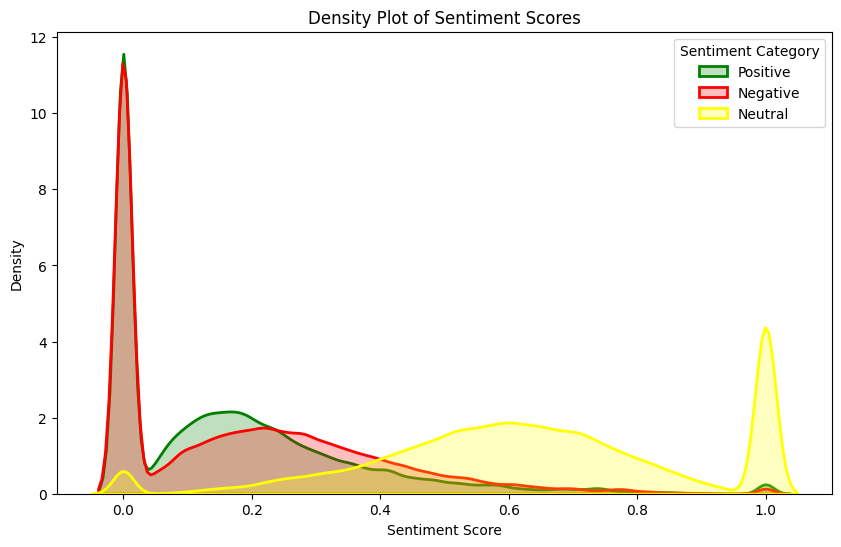

In [58]:
# Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
   sns.distplot(df[category], hist=False, kde=True,
               bins=int(180/5), color=color,
               hist_kws={'edgecolor': 'black'},
               kde_kws={'shade': True, 'linewidth': 2}, label=category)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()

C:\Users\danar\AppData\Local\Temp\ipykernel_24964\179694206.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\danar\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Compound', ylabel='Density'>

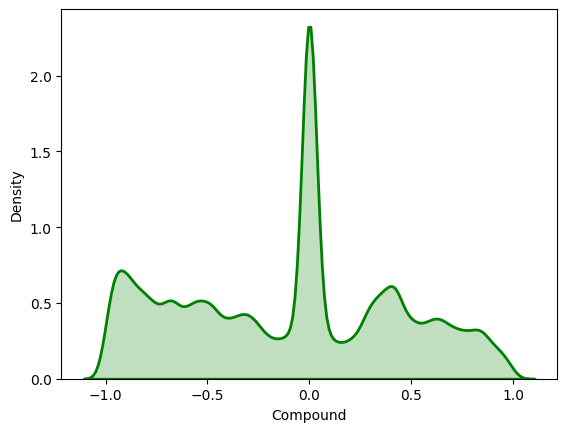

In [61]:
# Visualization of the Sentiment Scores

sns.distplot(df["Compound"], hist=False, kde=True, 
            bins=int(180/5), color = 'green', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'shade': True,'linewidth': 2})

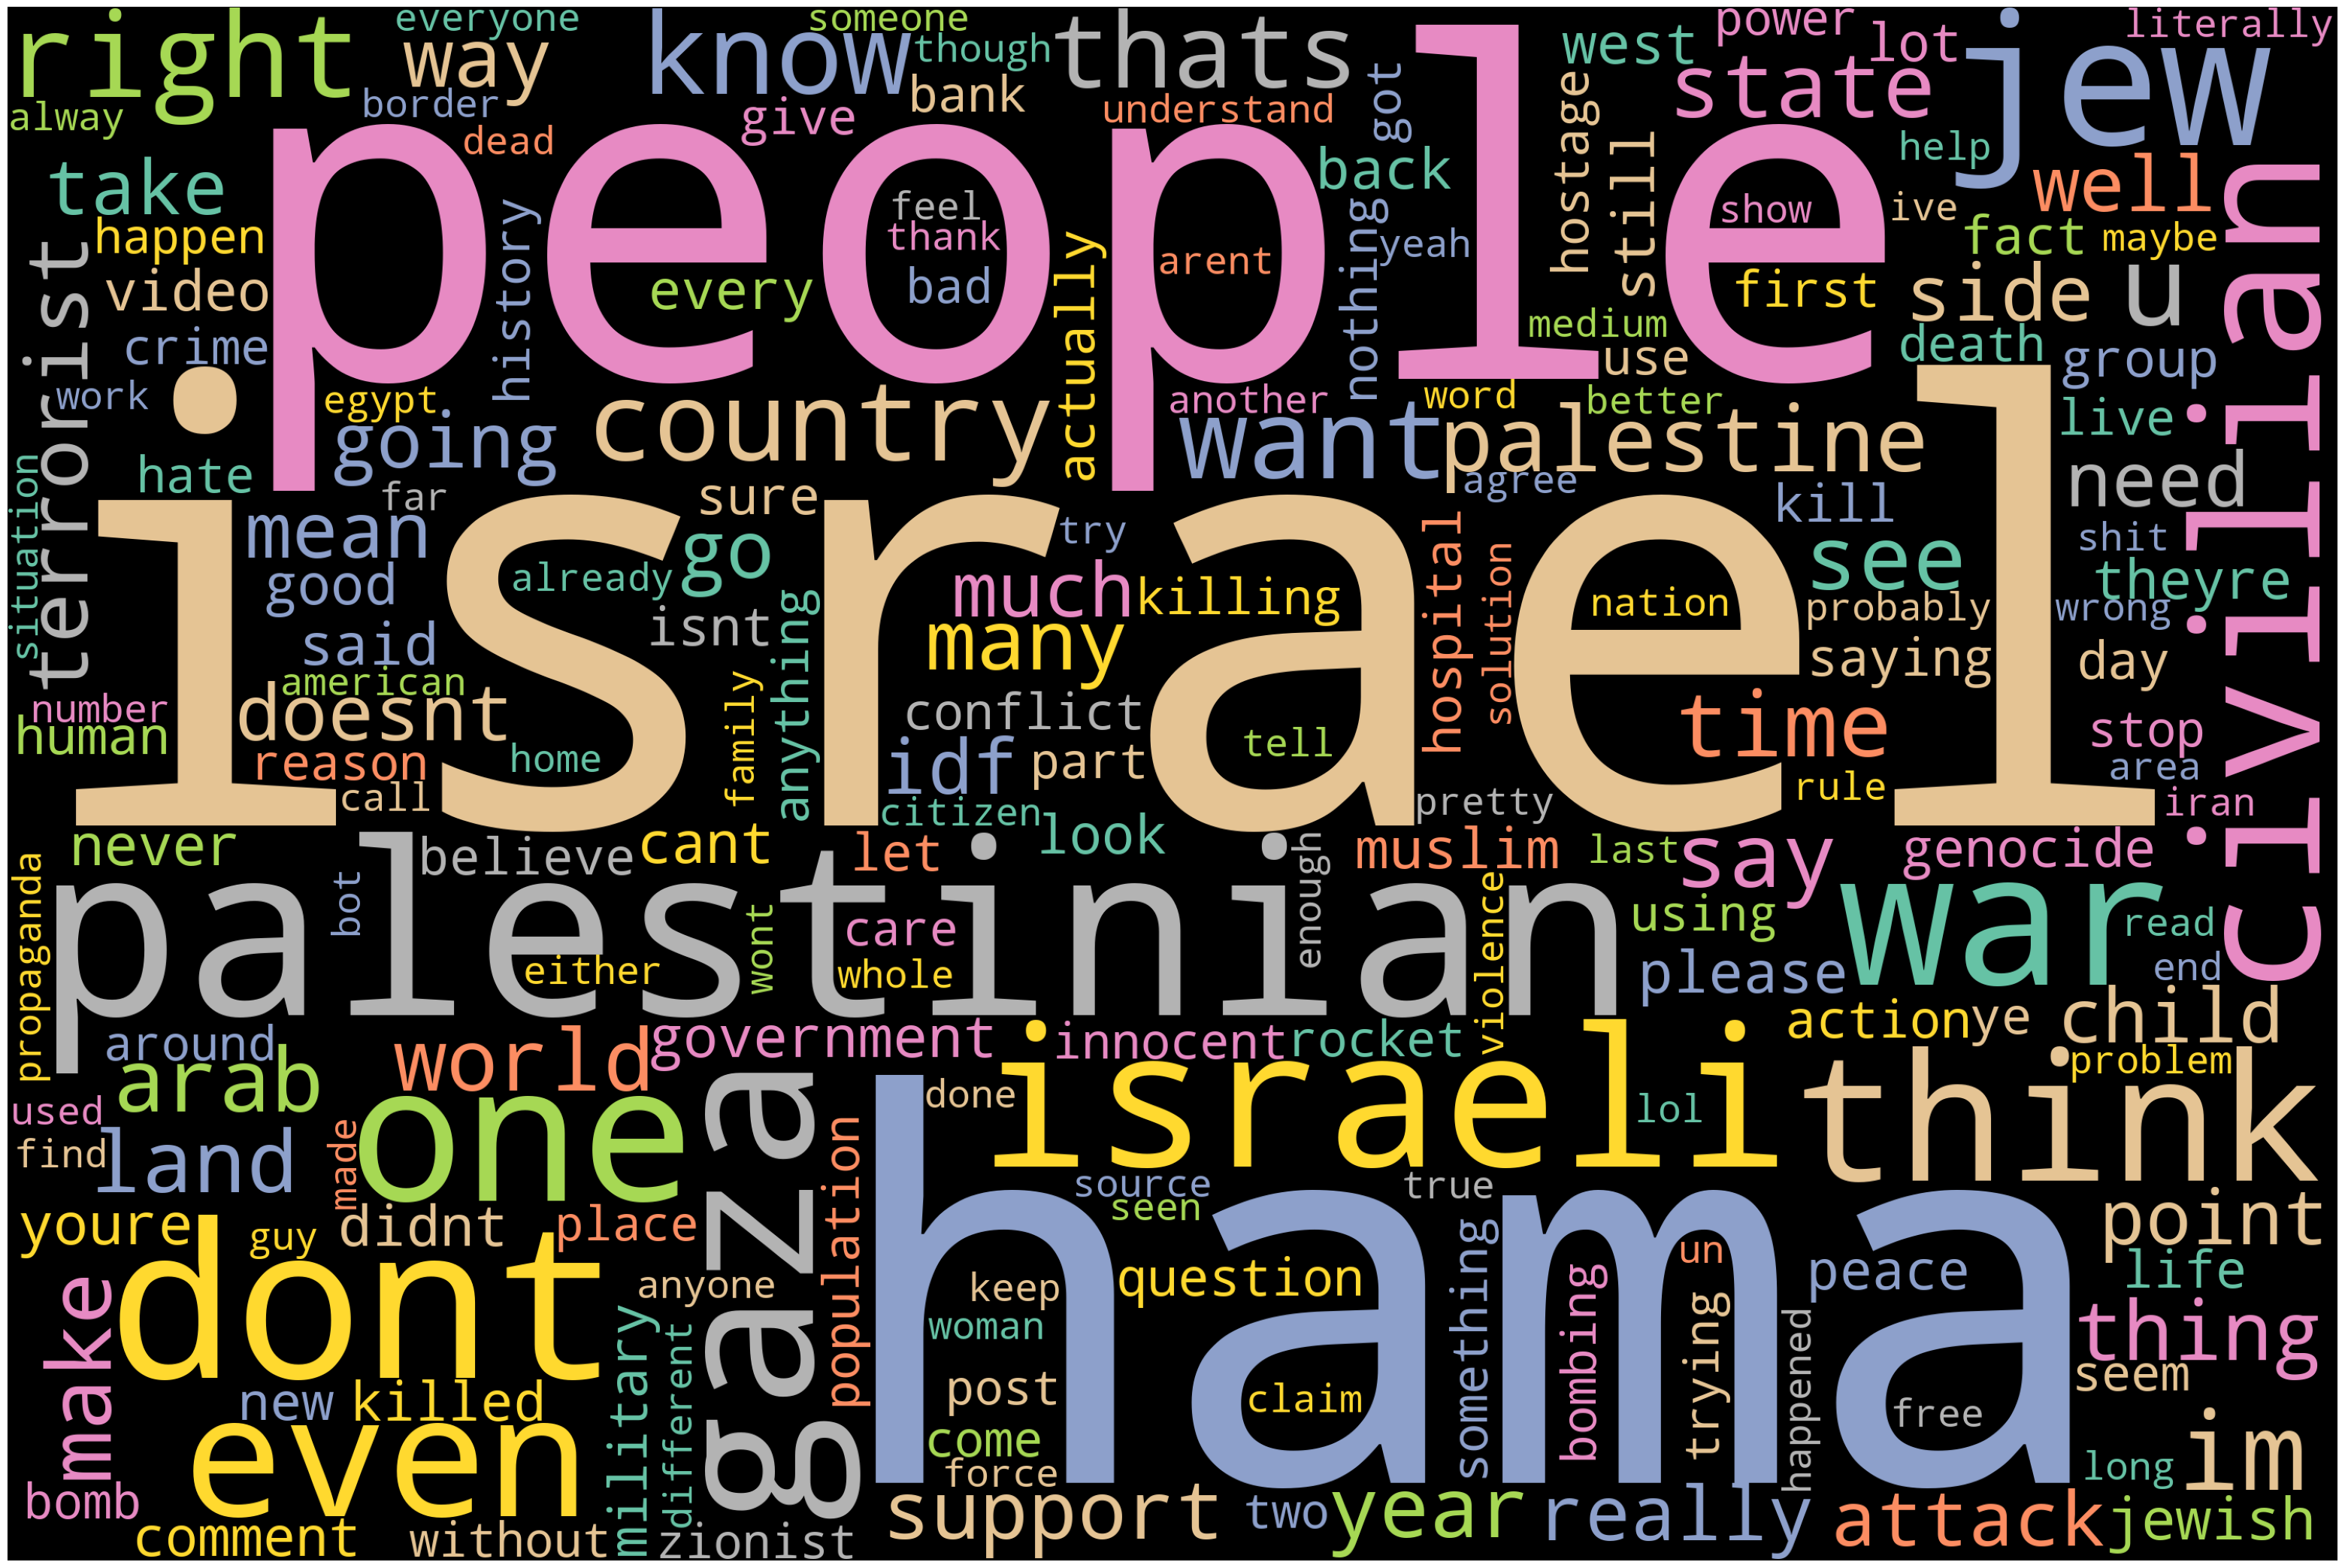

In [62]:
# WordCloud of All Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df.clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

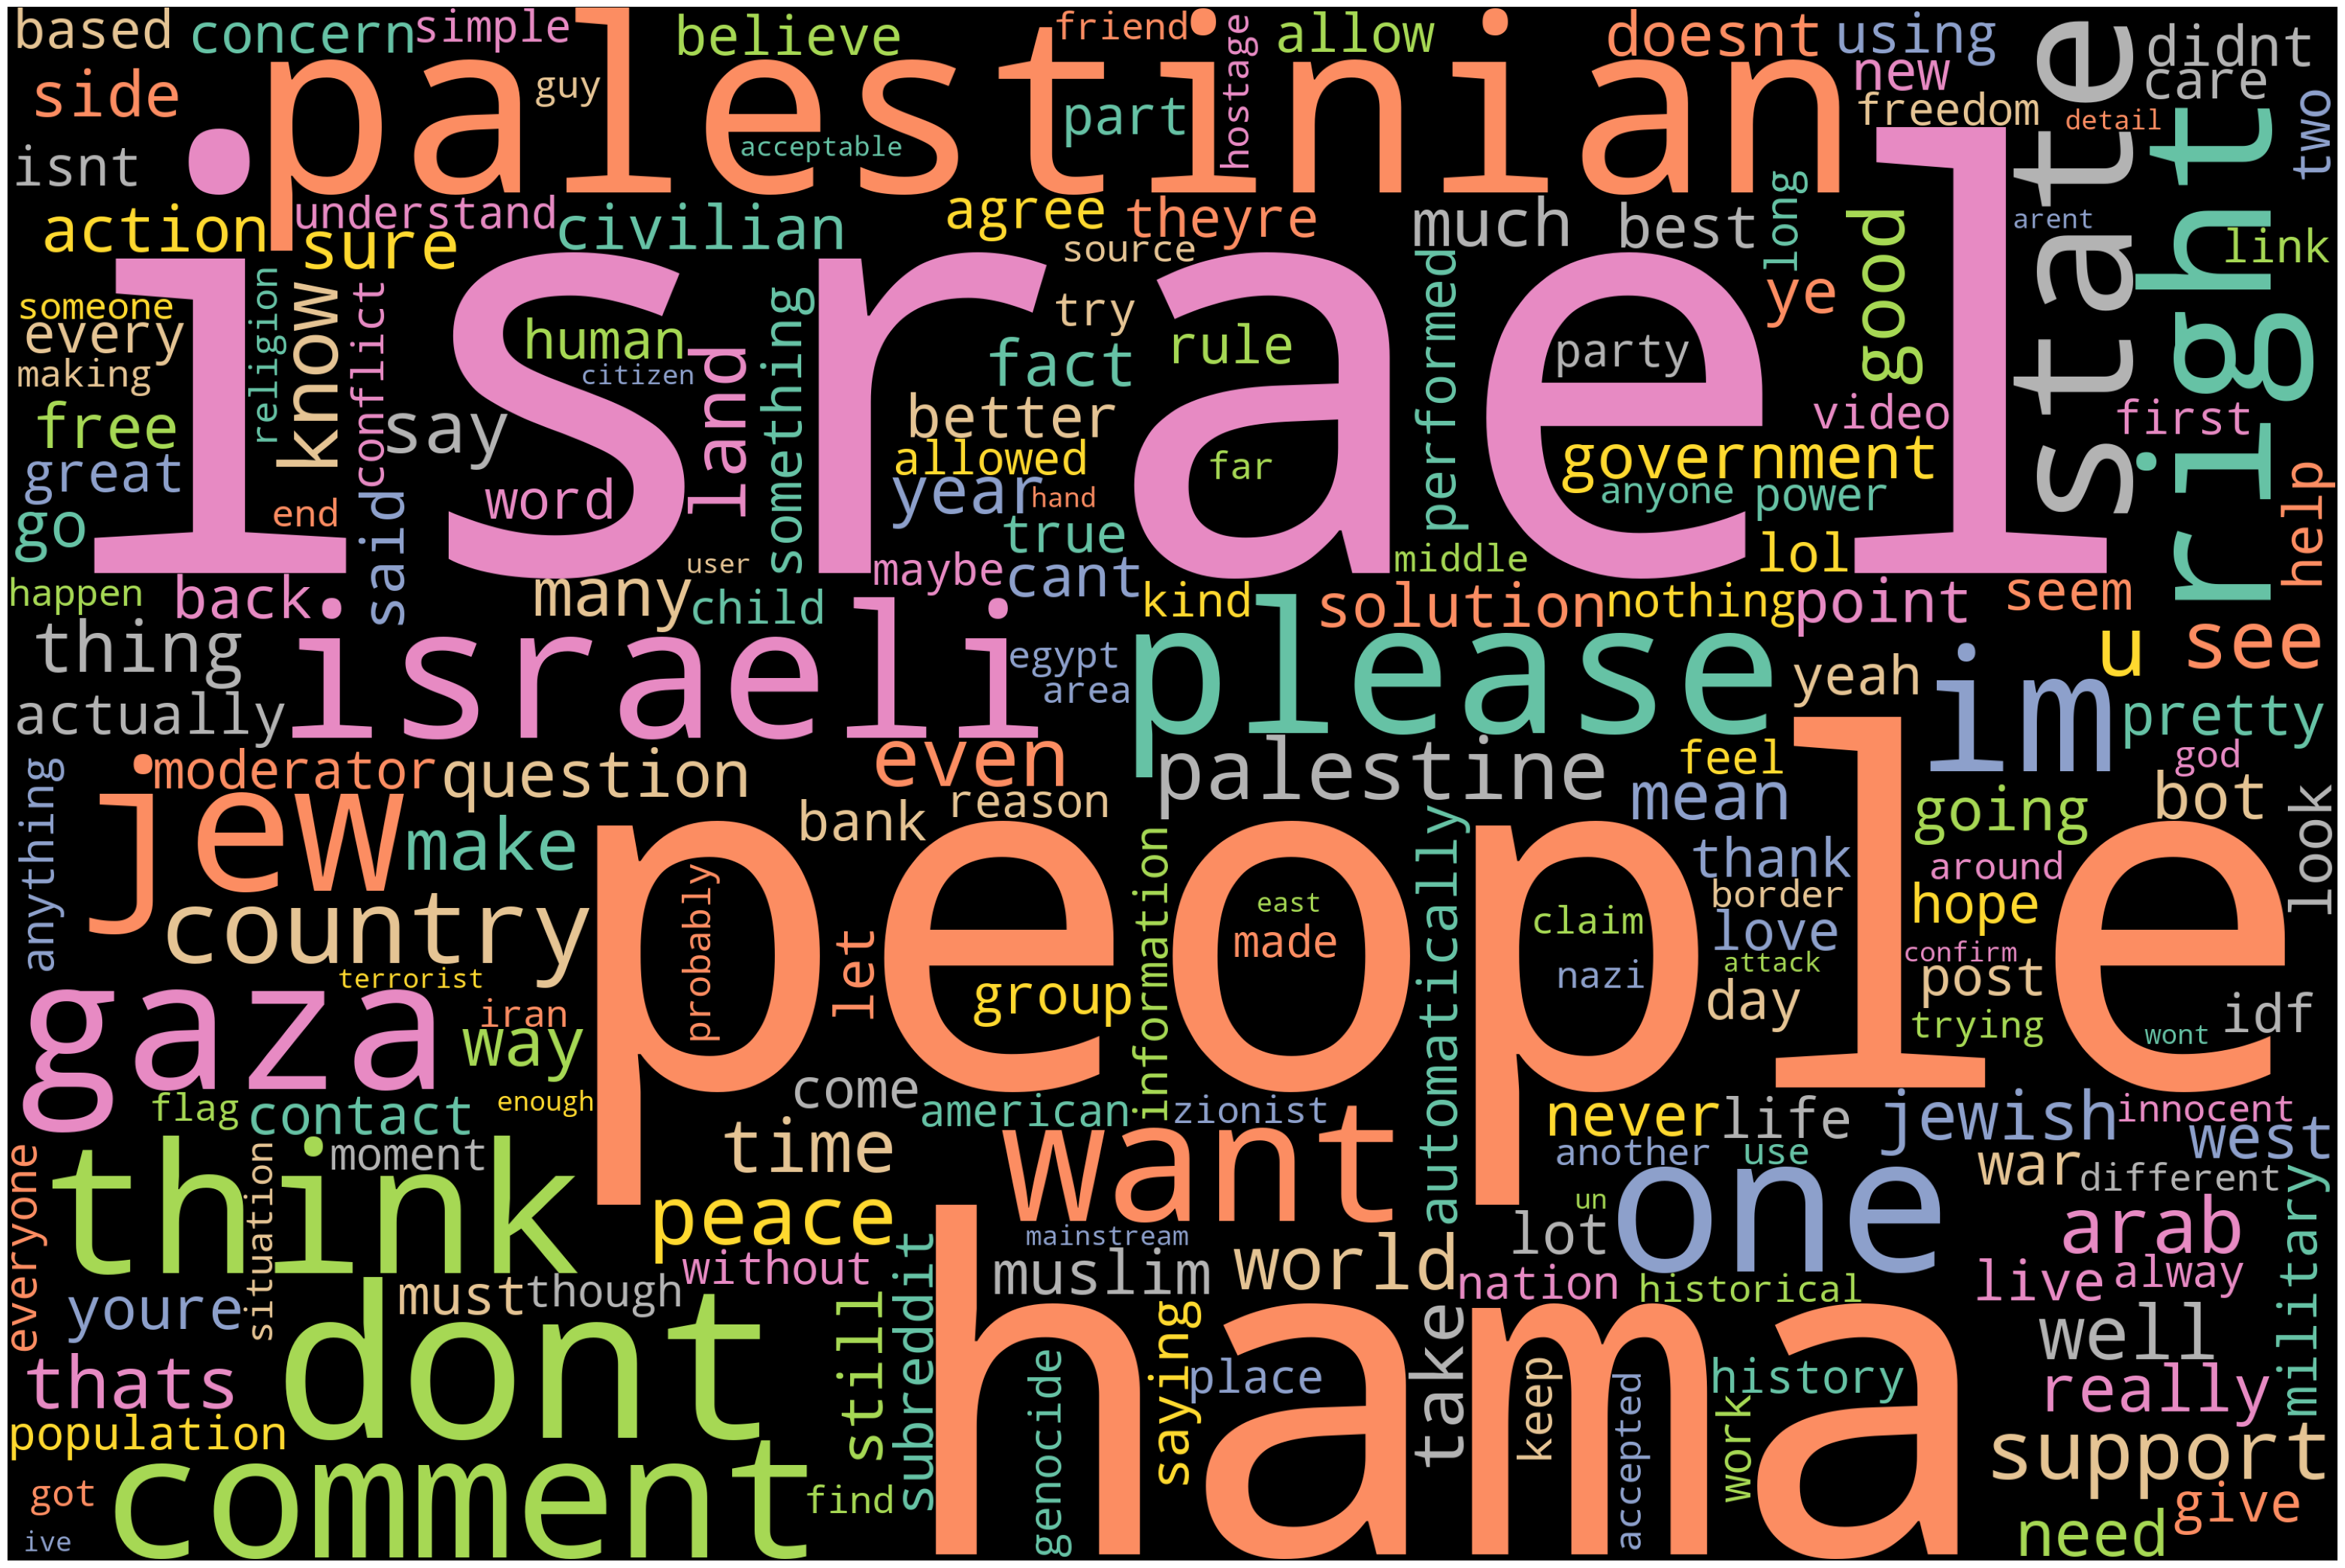

In [63]:
# WordCloud of Positive Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Positive'].clean_text)
                                          
# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

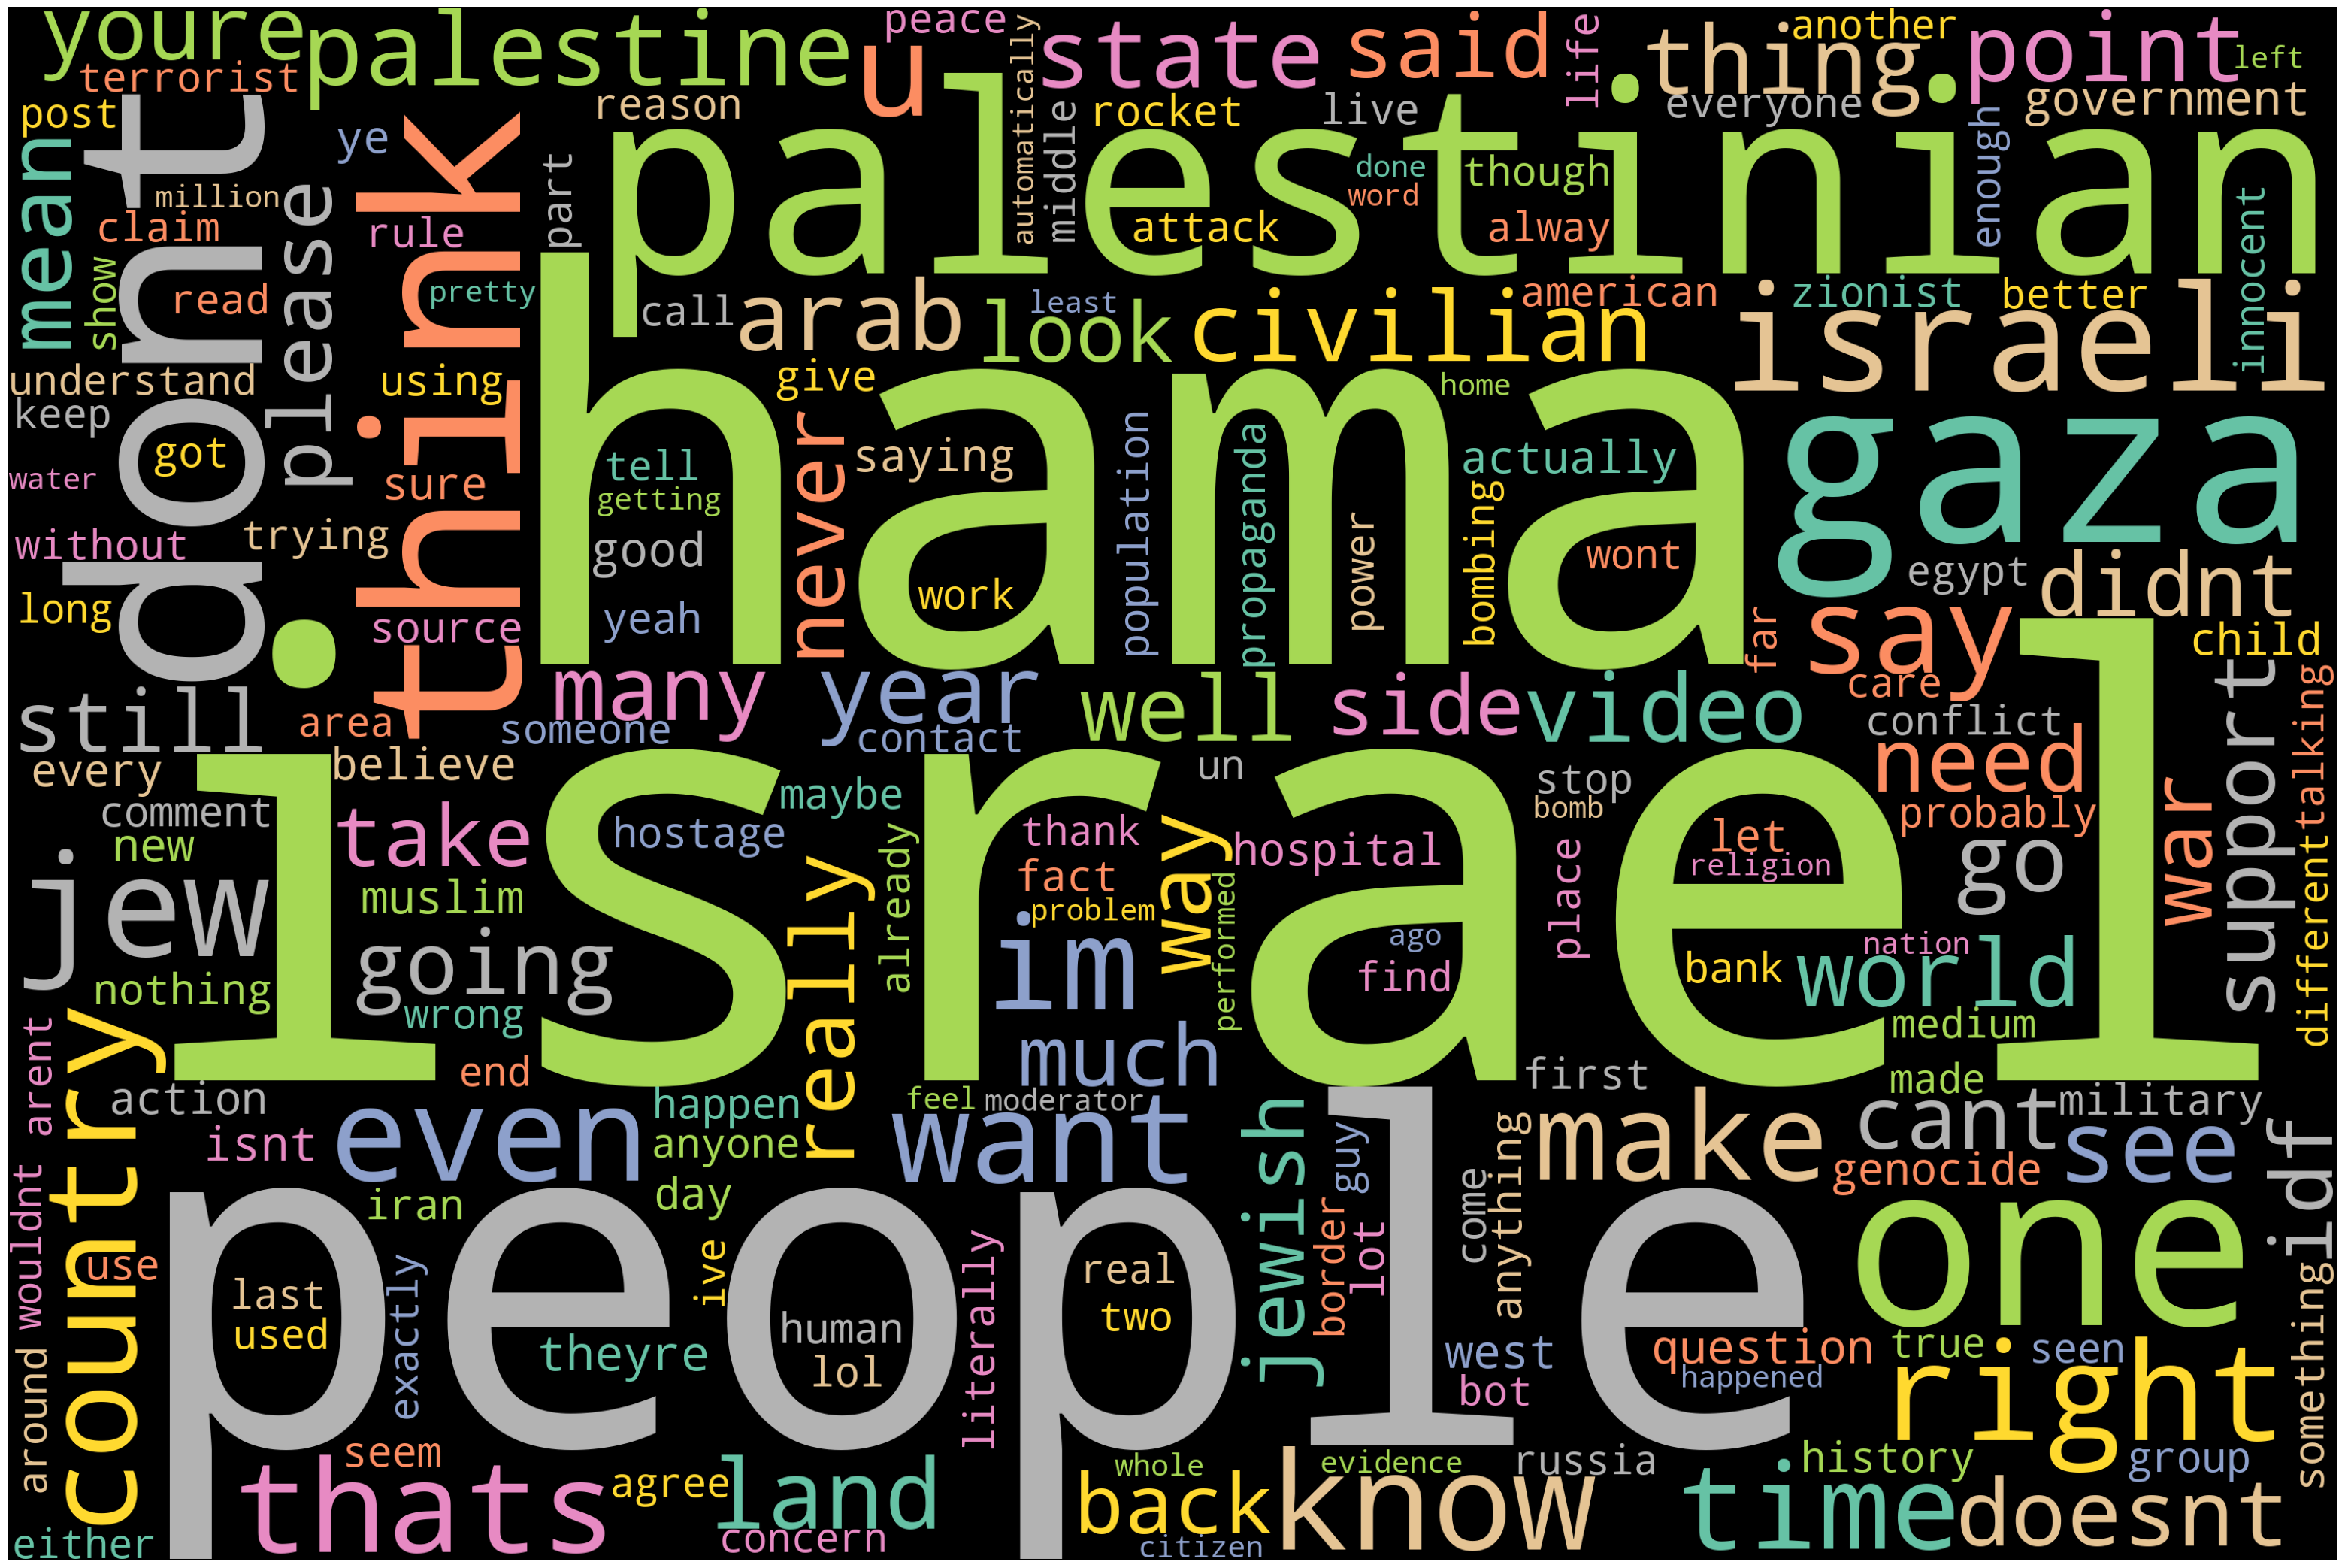

In [64]:
# WordCloud of Neutral Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Neutral'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

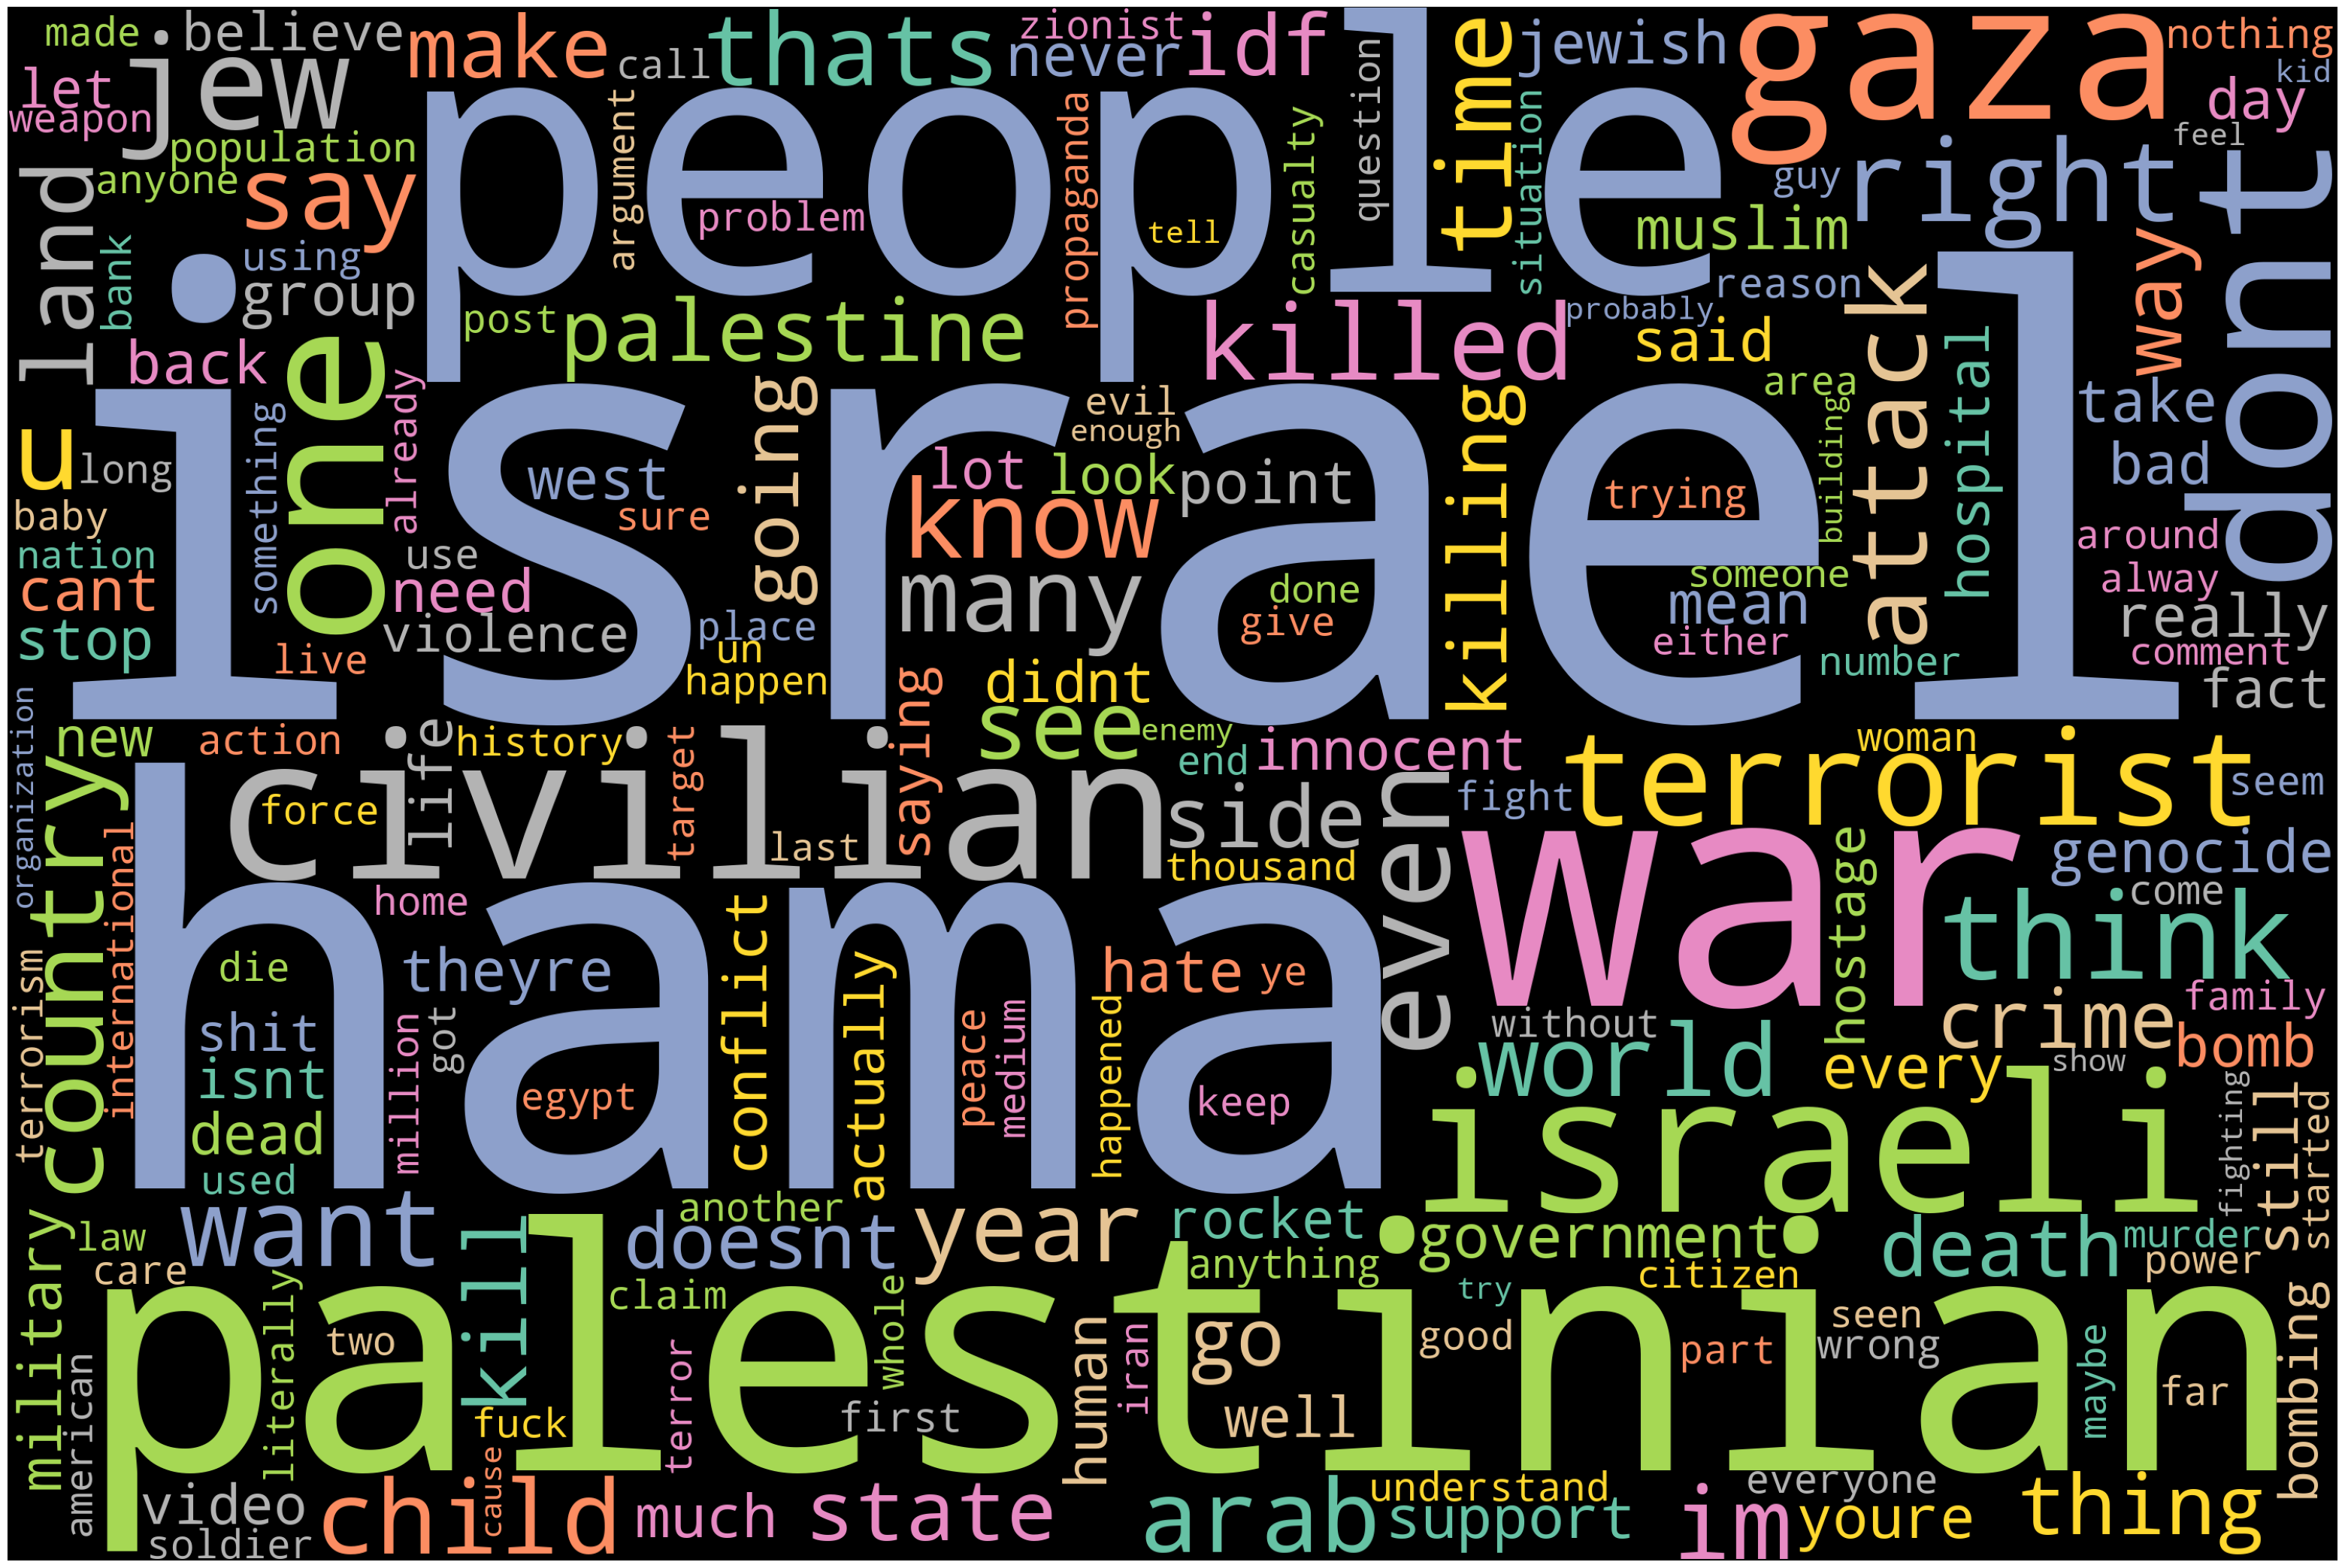

In [65]:
# WordCloud of Negative Sentiments

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Negative'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                     colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769651 entries, 0 to 769650
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   comment_id    769651 non-null  object 
 1   score         769651 non-null  int64  
 2   self_text     769649 non-null  object 
 3   subreddit     769651 non-null  object 
 4   created_time  769651 non-null  object 
 5   clean_text    769651 non-null  object 
 6   Compound      769651 non-null  float64
 7   Positive      769651 non-null  float64
 8   Negative      769651 non-null  float64
 9   Neutral       769651 non-null  float64
 10  Category      769651 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 64.6+ MB


In [67]:
df.head()

comment_id  score                                          self_text  \
0    k9tk1p2      1  Israel is like the most ethnically diverse cou...   
1    k9tjwfv      1  The only people starving them is Hamas who kee...   
2    k9tjpdl      1  The casualty numbers for the pakistan-afghanis...   
3    k9tjoep      1  that's like the most notable thing about the v...   
4    k9tjicm      2  'You thinking what I'm thinking?"\n\n"Aim for ...   

            subreddit               created_time  \
0     IsraelPalestine  2023-11-18 22:58:37+00:00   
1     IsraelPalestine  2023-11-18 22:57:30+00:00   
2       CombatFootage  2023-11-18 22:55:57+00:00   
3  NonCredibleDefense  2023-11-18 22:55:44+00:00   
4  NonCredibleDefense  2023-11-18 22:54:26+00:00   

                                          clean_text  Compound  Positive  \
0  israel like ethnically diverse country middle ...    0.3612     0.263   
1  people starving hamas keep hoarding aid food s...   -0.4215     0.000   
2  casualty number pakistanafghanistan conflict a...   -0.6597     0.130   
3      thats like notable thing video lmaoo nice one    0.6486     0.469   
4                      thinking im thinking aim bush    0.0000     0.000   

   Negative  Neutral  Category  
0     0.000    0.737   Neutral  
1     0.219    0.781   Neutral  
2     0.570    0.300  Negative  
3     0.000    0.531  Positive  
4     0.000    1.000   Neutral

### 4. POSITIVE NEGATIVE BIAS DETECTION

In [68]:
# Calculate the average sentiment scores for each subreddit
subreddit_sentiment = df.groupby('subreddit')[['Positive', 'Negative']].mean()

# Calculate the difference between positive and negative sentiment scores
subreddit_sentiment['Bias'] = subreddit_sentiment['Positive'] - subreddit_sentiment['Negative']

# Determine the direction of bias: Positive, Negative, or Neutral
def determine_bias_direction(bias):
   if bias > 0.01:  # You can adjust this threshold based on your dataset
      return 'Positive'
   elif bias < -0.01:  # You can adjust this threshold based on your dataset
      return 'Negative'
   else:
      return 'Neutral'

subreddit_sentiment['Bias Direction'] = subreddit_sentiment['Bias'].apply(determine_bias_direction)

# Sort subreddits based on bias in descending order
most_biased_subreddits = subreddit_sentiment.sort_values(by='Bias', ascending=False)

# Print or view the most biased subreddits with bias direction
print(most_biased_subreddits)

                       Positive  Negative      Bias Bias Direction
subreddit                                                         
AbruptChaos            0.170260  0.123790  0.046470       Positive
CrazyFuckingVideos     0.172251  0.158424  0.013827       Positive
NonCredibleDefense     0.157338  0.147750  0.009588        Neutral
Palestine              0.175961  0.188190 -0.012228       Negative
AskMiddleEast          0.166160  0.178500 -0.012340       Negative
ActualPublicFreakouts  0.175143  0.193862 -0.018719       Negative
IsraelPalestine        0.167693  0.187364 -0.019671       Negative
CombatFootage          0.158665  0.179134 -0.020469       Negative
worldnews              0.161203  0.186219 -0.025016       Negative
worldnewsvideo         0.173629  0.198985 -0.025357       Negative
TerrifyingAsFuck       0.163725  0.195814 -0.032089       Negative
PublicFreakout         0.160341  0.200716 -0.040376       Negative
IsrealPalestineWar_23  0.170765  0.219775 -0.049011       Nega

### 5. Topic Modelling

In [59]:
# Step 3: Topic Modeling
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
lda_model = LatentDirichletAllocation(n_components=8, random_state=123, n_jobs=-1)  # Assuming 5 topics
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)


In [60]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
n_top_words = 10  # You can adjust this number to display more or fewer words per topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
   top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
   top_words = [feature_names[i] for i in top_words_idx]
   top_words_per_topic.append(top_words)

# Print the topics and associated words
for topic_idx, top_words in enumerate(top_words_per_topic):
   print(f"Topic #{topic_idx + 1}:")
   print(", ".join(top_words))
   print()

Topic #1:
source, dont, lol, know, say, read, said, im, youre, people

Topic #2:
yes, question, fuck, bot, point, genocide, concern, automatically, action, contact

Topic #3:
hamas, israel, gaza, palestinian, people, want, war, dont, civilian, think

Topic #4:
hamas, people, israel, palestinian, child, terrorist, civilian, israeli, dont, innocent

Topic #5:
hostage, like, water, hamas, good, israel, thank, dont, gaza, time

Topic #6:
comment, shit, got, im, guy, like, nazi, lmao, god, man

Topic #7:
israel, jew, palestinian, arab, land, state, country, people, palestine, right

Topic #8:
hamas, hospital, civilian, rocket, israel, idf, bomb, gaza, like, military



In [61]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']

In [62]:
topic_term_distribution = lda_model.components_

In [63]:
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()
print(israel_topic_index)
print(palestine_topic_index)

2
6


In [ ]:
# # Extract topic indices from the words associated with 'israel' and 'palestine'
# israel_topic_index = [topic_word[0] for topic_word in israel_topic_words]
# palestine_topic_index = [topic_word[0] for topic_word in palestine_topic_words]

## Geopolitical Stance Determination Using Dominant Topics and Sentiment Scores

In [64]:
# Define the function to determine geopolitical stance
def determine_geopolitical_stance(row):
   sentiment_score = row['Compound']
   topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]
   
   # Determine stance based on sentiment score and dominant topic
   if sentiment_score <= -0.5:
      return 'Against Israel/Palestine'
   elif sentiment_score >= 0.5 and topic_distribution.argmax() == israel_topic_index:
      return 'Supports Israel'
   elif sentiment_score >= 0.5 and topic_distribution.argmax() == palestine_topic_index:
      return 'Supports Palestine'
   else:
      return 'Neutral/Stance Not Clear'

# Apply the function to the DataFrame to determine geopolitical stances
df['geopolitical_stance'] = df.apply(determine_geopolitical_stance, axis=1)


# output data is gopolitical_stance.csv (sudah ada)

In [67]:
# make csv
df.to_csv('geopolitical_stance.csv', index=False)

In [65]:
stance_counts = df['geopolitical_stance'].value_counts()
print("Geopolitical Stance Distribution:")
print(stance_counts)

Geopolitical Stance Distribution:
Neutral/Stance Not Clear    500476
Against Israel/Palestine    218908
Supports Palestine           30353
Supports Israel              19914
Name: geopolitical_stance, dtype: int64


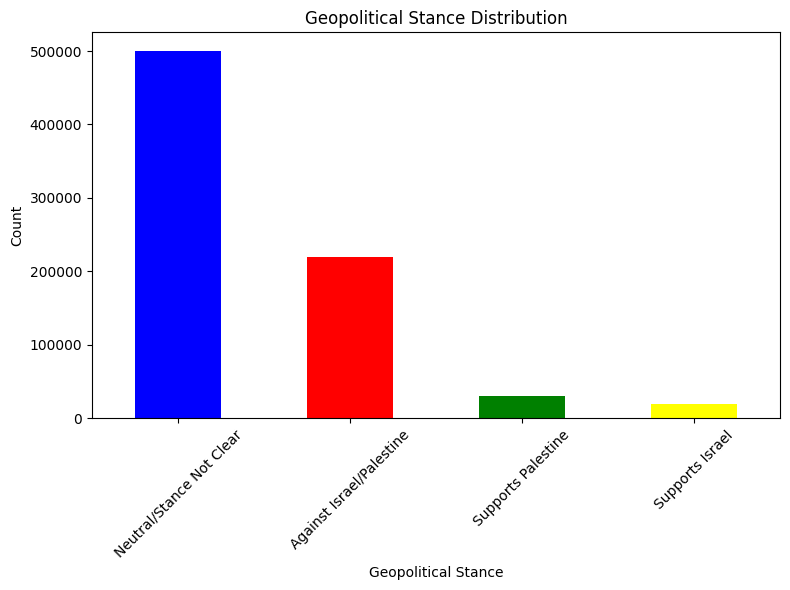

In [68]:
# Assuming 'geopolitical_stance' is a column in your DataFrame df
stance_counts = df['geopolitical_stance'].value_counts()

# Create bar chart using DataFrame values
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color=['blue', 'red', 'green', 'yellow'])
plt.xlabel('Geopolitical Stance')
plt.ylabel('Count')
plt.title('Geopolitical Stance Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the chart
plt.show()